In [1]:
import os
import numpy as np
import pandas as pd
import plotly as pl
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
import pylab
import random
from sklearn import linear_model

In [3]:
data = pd.read_csv("insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
count_none = {}
for h in data:
    count_none[h] = data[h].isna().sum()

print(count_none)

for h in data:
    if data[h].dtypes != "int64" and data[h].dtypes != "float64":
        data[h] = data[h].fillna("other")
    else:
        med = data[h].median()
        data[h] = data[h].fillna(med)

count_none = {}
for h in data:
    count_none[h] = data[h].isna().sum()

print(count_none)

region = {}
print("region")
count = 0
for ind, row in data.iterrows():
    region[row["region"]] = count
    count += 1
print(region)

{'age': 0, 'sex': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges': 0}
{'age': 0, 'sex': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges': 0}
region
{'southwest': 1336, 'southeast': 1335, 'northwest': 1337, 'northeast': 1334}


In [60]:
res = sts.f_oneway(data['region'], data['bmi'])
print(res)

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('bmi ~ C(region)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4055.880631     3.0  39.495057  1.881839e-24
Residual   45664.319755  1334.0        NaN           NaN


In [61]:
a = 0.05
a_m = a/6
print("a/m = %f"%a_m)

print(sts.ttest_ind(data[data["region"] == "northwest"].bmi, data[data["region"] == "southwest"].bmi))
print(sts.ttest_ind(data[data["region"] == "northwest"].bmi, data[data["region"] == "southeast"].bmi))
print(sts.ttest_ind(data[data["region"] == "northwest"].bmi, data[data["region"] == "northeast"].bmi))

print(sts.ttest_ind(data[data["region"] == "northeast"].bmi, data[data["region"] == "southwest"].bmi))
print(sts.ttest_ind(data[data["region"] == "northeast"].bmi, data[data["region"] == "southeast"].bmi))

print(sts.ttest_ind(data[data["region"] == "southeast"].bmi, data[data["region"] == "southwest"].bmi))


a/m = 0.008333
Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)
Ttest_indResult(statistic=-9.25649013552548, pvalue=2.643571405230106e-19)
Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)
Ttest_indResult(statistic=-3.1169000930045923, pvalue=0.0019086161671573072)
Ttest_indResult(statistic=-8.790905562598699, pvalue=1.186014937424813e-17)
Ttest_indResult(statistic=5.908373821545118, pvalue=5.4374009639680636e-09)


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,-0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,-0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


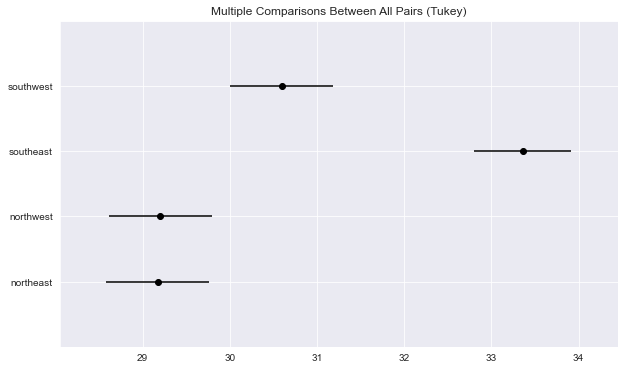

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups=data['region'])
tukey.plot_simultaneous()
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5, color='red')
tukey.summary()

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('bmi ~ C(region) + C(sex)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(region)   4034.975135     3.0  39.336119  2.342323e-24
C(sex)        86.007035     1.0   2.515393  1.129767e-01
Residual   45578.312720  1333.0        NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
female,male,0.5654,0.09,-0.0883,1.2191,False


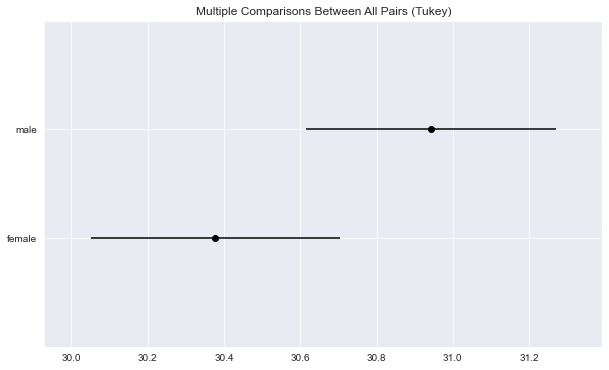

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups=data['sex'])
tukey.plot_simultaneous()
plt.vlines(x = 49.57, ymin = -0.5, ymax = 4.5, color='red')
tukey.summary()